In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
%reset -f

In [2]:
import numpy as np
import time
import cv2
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
from skimage import io,color
from skimage.feature import hog
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Part1:Face Social Traits Classification(or Regression)

## 1.1 Classification by Landmarks

In [3]:
train_anno=loadmat('train-anno.mat')
annotation=train_anno['trait_annotation'] #(491*14)
lms=train_anno['face_landmark'] #(491*160)

In [4]:
path="E:/Stats M231/Project1/landmarks/"  #待读取的文件夹
path_list=os.listdir(path)

In [5]:
random_state=20160401
kf = KFold(n_splits=4,shuffle=True,random_state=random_state)

## Use SVR to get the MSE of each classifer

In [6]:
min_max_scaler = MinMaxScaler()
#y_min_max_scaler = MinMaxScaler()
lms_scale = min_max_scaler.fit_transform(lms)
#X_test_minmax = min_max_scaler.transform(X_test)

Train_MSE=np.zeros(14)
Test_MSE=np.zeros(14)
param_grid={"C": np.logspace(-2, 2, 5),
            "gamma": np.logspace(-4, -1, 4),
            "epsilon": [0.001, 0.01, 0.1]}

svr = GridSearchCV(SVR(kernel='rbf'),param_grid ,cv=4)

In [7]:
for i in range(annotation.shape[1]):
    train_mse=[]
    test_mse=[]
    for train, test in kf.split(lms_scale):
        train_X=lms_scale[train,:]
        test_X=lms_scale[test,:]
        t0 = time.time()
        svr.fit(train_X, annotation[train,i])
        print("done in %0.3fs" % (time.time() - t0))
        print("Best estimator found by grid search:")
        print(svr.best_estimator_)
        train_Y=svr.predict(train_X)
        test_Y=svr.predict(test_X)
        train_mse.append(mean_squared_error(annotation[train,i], train_Y))
        test_mse.append(mean_squared_error(annotation[test,i], test_Y))
    print("The Train MSE for No.%d facial trait is:" %(i+1))
    Train_MSE[i]=np.mean(np.array(train_mse))
    Train_MSE[i]
    print("The Test MSE for No.%d facial trait is:" %(i+1))
    Test_MSE[i]=np.mean(np.array(test_mse))
    Test_MSE[i]

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.087s
Best estimator found by grid search:
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.142s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.286s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.159s
Best estimator found by grid search:
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.1 facial trait is:


0.14300424982746976

The Test MSE for No.1 facial trait is:


0.19543498583002494

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.251s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.986s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.501s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.182s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.2 facial trait is:


0.10123426846281808

The Test MSE for No.2 facial trait is:


0.11580416758712545

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.547s
Best estimator found by grid search:
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.809s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.565s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.426s
Best estimator found by grid search:
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.3 facial trait is:


0.09825485504744078

The Test MSE for No.3 facial trait is:


0.1317538743465274

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.861s
Best estimator found by grid search:
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.624s
Best estimator found by grid search:
SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.855s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.750s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.4 facial trait is:


0.06103763977111329

The Test MSE for No.4 facial trait is:


0.06955733829508168

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.903s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.842s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.745s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.956s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.5 facial trait is:


0.08819307290201951

The Test MSE for No.5 facial trait is:


0.11713857381973654

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.976s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.804s
Best estimator found by grid search:
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.862s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.051s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.6 facial trait is:


0.05961525693243171

The Test MSE for No.6 facial trait is:


0.07860549621749577

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.840s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.745s
Best estimator found by grid search:
SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.752s
Best estimator found by grid search:
SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.754s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.7 facial trait is:


0.07400697541648646

The Test MSE for No.7 facial trait is:


0.08458935788466775

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.600s
Best estimator found by grid search:
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.633s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.673s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.652s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.8 facial trait is:


0.05847315632423165

The Test MSE for No.8 facial trait is:


0.06649827876968598

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.484s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.581s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.608s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.450s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.9 facial trait is:


0.05011647032534528

The Test MSE for No.9 facial trait is:


0.057354004357190534

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.685s
Best estimator found by grid search:
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.513s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.836s
Best estimator found by grid search:
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.811s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.10 facial trait is:


0.04349213841412886

The Test MSE for No.10 facial trait is:


0.0509331762461723

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.406s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.906s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.606s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.722s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.11 facial trait is:


0.05122072633240073

The Test MSE for No.11 facial trait is:


0.06070152159002951

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.611s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.607s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.451s
Best estimator found by grid search:
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.765s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.12 facial trait is:


0.06824570728035119

The Test MSE for No.12 facial trait is:


0.0776160738963446

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.842s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 9.847s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.053s
Best estimator found by grid search:
SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.154s
Best estimator found by grid search:
SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.13 facial trait is:


0.0639360213803233

The Test MSE for No.13 facial trait is:


0.07243620946301522

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.094s
Best estimator found by grid search:
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.053s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.036s
Best estimator found by grid search:
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'epsilon': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 10.211s
Best estimator found by grid search:
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
The Train MSE for No.14 facial trait is:


0.07159201733193007

The Test MSE for No.14 facial trait is:


0.08470925618887828

Text(0.5,1,'(a) mean square error')

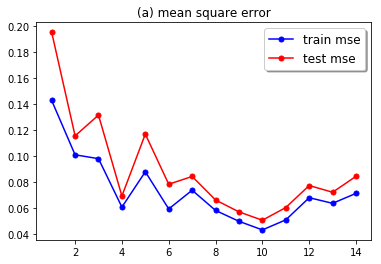

In [9]:
No_traits=np.linspace(1,14,14)
fig, ax = plt.subplots()
ax.plot(No_traits, Train_MSE, 'b',marker='.',markersize=10, label='train mse')
ax.plot(No_traits, Test_MSE, 'r', marker='.',markersize=10,label='test mse')
legend = ax.legend(loc='upper right', shadow=True, fontsize='large')
size = fig.get_size_inches() # get fig size in pixels
ax.set_title('(a) mean square error') 
fig.savefig('MSE.jpg')   # save the figure to file
#plt.close(fig)    # close the figure

## Use SVC to get the Accuracy and Precision of each classifer

In [10]:
Train_Accuracy=np.zeros(14)
Test_Accuracy=np.zeros(14)
Train_Precision=np.zeros(14)
Test_Precision=np.zeros(14)
new_anno=np.array(2*(annotation>0)-1)
param_grid_svc={"C": np.logspace(-2, 4, 6),
            "gamma": np.logspace(-4, -1, 5)}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),param_grid_svc, cv=4)

In [11]:
for i in range(new_anno.shape[1]):
    train_accuracy=[]
    test_accuracy=[]
    train_precision=[]
    test_precision=[]
    for train, test in kf.split(lms_scale):
        train_X=lms_scale[train,:]
        test_X=lms_scale[test,:]
        t0 = time.time()
        clf.fit(train_X, new_anno[train,i])
        print("done in %0.3fs" % (time.time() - t0))
        print("Best estimator found by grid search:")
        print(clf.best_estimator_)
        train_Y=clf.predict(train_X)
        test_Y=clf.predict(test_X)
        train_accuracy.append(accuracy_score(new_anno[train,i], train_Y))
        test_accuracy.append(accuracy_score(new_anno[test,i], test_Y))
        train_precision.append(precision_score(new_anno[train,i], train_Y))
        test_precision.append(precision_score(new_anno[test,i], test_Y))
        
    print("The Train Accuracy for No.%d facial trait is:" %(i+1))
    Train_Accuracy[i]=np.mean(np.array(train_accuracy))
    Train_Accuracy[i]
    print("The Test Accuracyfor No.%d facial trait is:" %(i+1))
    Test_Accuracy[i]=np.mean(np.array(test_accuracy))
    Test_Accuracy[i]
    print("The Train Precision for No.%d facial trait is:" %(i+1))
    Train_Precision[i]=np.mean(np.array(train_precision))
    Train_Precision[i]
    print("The Test Precision for No.%d facial trait is:" %(i+1))
    Test_Precision[i]=np.mean(np.array(test_precision))
    Test_Precision[i]
    

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.487s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.546s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.276s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.364s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.1 facial trait is:


0.8138586956521738

The Test Accuracyfor No.1 facial trait is:


0.5886145541783286

The Train Precision for No.1 facial trait is:


0.829047818458724

The Test Precision for No.1 facial trait is:


0.5851926195579447

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.648s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005623413251903491,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.407s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005623413251903491,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.712s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.517s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005623413251903491,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.2 facial trait is:


0.8207920937905031

The Test Accuracyfor No.2 facial trait is:


0.5804344928695189

The Train Precision for No.2 facial trait is:


0.8224699508263893

The Test Precision for No.2 facial trait is:


0.5790625724424472

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.399s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.052s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.073s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.050s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.3 facial trait is:


0.7983239071521151

The Test Accuracyfor No.3 facial trait is:


0.6210682393709183

The Train Precision for No.3 facial trait is:


0.8276407814711508

The Test Precision for No.3 facial trait is:


0.6470233988023362

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.606s
Best estimator found by grid search:
SVC(C=0.15848931924611134, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.375s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005623413251903491,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.211s
Best estimator found by grid search:
SVC(C=2.5118864315095797, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.514s
Best estimator found by grid search:
SVC(C=2.5118864315095797, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The Train Accuracy for No.4 facial trait is:


0.7562577324142806

The Test Accuracyfor No.4 facial trait is:


0.5436991869918699

The Train Precision for No.4 facial trait is:


0.7814765273090291

The Test Precision for No.4 facial trait is:


0.5556805881368723

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.309s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.370s
Best estimator found by grid search:
SVC(C=0.15848931924611134, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.277s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.258s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.5 facial trait is:


0.7889179774949924

The Test Accuracyfor No.5 facial trait is:


0.5295881647341063

The Train Precision for No.5 facial trait is:


0.7808669325062767

The Test Precision for No.5 facial trait is:


0.4936341813613317

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 4.997s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 4.984s
Best estimator found by grid search:
SVC(C=0.15848931924611134, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.206s
Best estimator found by grid search:
SVC(C=0.15848931924611134, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.042s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005623413251903491,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.6 facial trait is:


0.7684915164369035

The Test Accuracyfor No.6 facial trait is:


0.6802112488337997

The Train Precision for No.6 facial trait is:


0.7544091290997231

The Test Precision for No.6 facial trait is:


0.670303055613158

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.721s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.472s
Best estimator found by grid search:
SVC(C=2.5118864315095797, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.853s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.813s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.7 facial trait is:


0.8072916666666666

The Test Accuracyfor No.7 facial trait is:


0.48682193789151007

The Train Precision for No.7 facial trait is:


0.8085226342196945

The Test Precision for No.7 facial trait is:


0.5069682335726933

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.742s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.660s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.551s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005623413251903491,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.505s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005623413251903491,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.8 facial trait is:


0.7868744108636739

The Test Accuracyfor No.8 facial trait is:


0.543815807010529

The Train Precision for No.8 facial trait is:


0.7911164193519573

The Test Precision for No.8 facial trait is:


0.5494293627662531

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.392s
Best estimator found by grid search:
SVC(C=2.5118864315095797, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.422s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.356s
Best estimator found by grid search:
SVC(C=2.5118864315095797, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.282s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005623413251903491,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.9 facial trait is:


0.7835255390597384

The Test Accuracyfor No.9 facial trait is:


0.5863987738238038

The Train Precision for No.9 facial trait is:


0.8005633756475754

The Test Precision for No.9 facial trait is:


0.6166788132002222

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.280s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.403s
Best estimator found by grid search:
SVC(C=2.5118864315095797, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.429s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.272s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005623413251903491,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.10 facial trait is:


0.7508468834688347

The Test Accuracyfor No.10 facial trait is:


0.5762861522057844

The Train Precision for No.10 facial trait is:


0.7557644356219486

The Test Precision for No.10 facial trait is:


0.5853782751685148

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 6.010s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005623413251903491,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.525s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.561s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.543s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.11 facial trait is:


0.7733150701072229

The Test Accuracyfor No.11 facial trait is:


0.5744202319072371

The Train Precision for No.11 facial trait is:


0.777766246514884

The Test Precision for No.11 facial trait is:


0.5859184840316916

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.640s
Best estimator found by grid search:
SVC(C=2.5118864315095797, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.420s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.444s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.457s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.12 facial trait is:


0.7013023594909863

The Test Accuracyfor No.12 facial trait is:


0.6069405571104891

The Train Precision for No.12 facial trait is:


0.6729513102631298

The Test Precision for No.12 facial trait is:


0.5792746792354019

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.559s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005623413251903491,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.462s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.545s
Best estimator found by grid search:
SVC(C=10000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.520s
Best estimator found by grid search:
SVC(C=2.5118864315095797, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
The Train Accuracy for No.13 facial trait is:


0.6897792211617768

The Test Accuracyfor No.13 facial trait is:


0.5377015860322538

The Train Precision for No.13 facial trait is:


0.710775293536806

The Test Precision for No.13 facial trait is:


0.557530456208572

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.378s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.387s
Best estimator found by grid search:
SVC(C=39.81071705534969, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.380s
Best estimator found by grid search:
SVC(C=2.5118864315095797, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01778279410038923,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.58489e-01, 2.51189e+00, 3.98107e+01, 6.30957e+02,
       1.00000e+04]), 'gamma': array([0.0001 , 0.00056, 0.00316, 0.01778, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 5.246s
Best estimator found by grid search:
SVC(C=630.957344480193, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The Train Accuracy for No.14 facial trait is:


0.8344637386591258

The Test Accuracyfor No.14 facial trait is:


0.5620918299346929

The Train Precision for No.14 facial trait is:


0.8352468896905314

The Test Precision for No.14 facial trait is:


0.5536411376521981

Text(0.5,1,'(b) Average Accuracy')

Text(0.5,1,'(c) Average Precision')

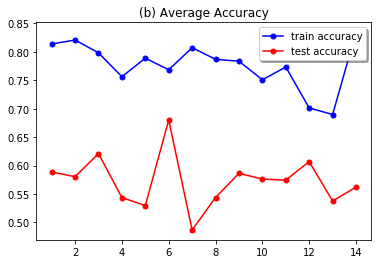

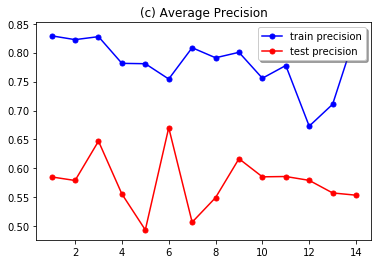

In [13]:
fig, ax = plt.subplots()
ax.plot(No_traits, Train_Accuracy, 'b',marker='.',markersize=10, label='train accuracy')
ax.plot(No_traits, Test_Accuracy, 'r', marker='.',markersize=10,label='test accuracy')
legend = ax.legend(loc='upper right', shadow=True)
size = fig.get_size_inches() # get fig size in pixels
ax.set_title('(b) Average Accuracy') 
fig.savefig('Accuracy.jpg')   # save the figure to file
#plt.close(fig)    # close the figure
fig, ax = plt.subplots()
ax.plot(No_traits, Train_Precision, 'b',marker='.',markersize=10, label='train precision')
ax.plot(No_traits, Test_Precision, 'r', marker='.',markersize=10,label='test precision')
legend = ax.legend(loc='upper right', shadow=True)
size = fig.get_size_inches() # get fig size in pixels
ax.set_title('(c) Average Precision') 
fig.savefig('Precision.jpg')   # save the figure to file
#plt.close(fig)    # close the figure

In [22]:
print("The Average Accuracy using landmarks are:" )
Test_Accuracy

array([0.58861455, 0.58043449, 0.62106824, 0.54369919, 0.52958816,
       0.68021125, 0.48682194, 0.54381581, 0.58639877, 0.57628615,
       0.57442023, 0.60694056, 0.53770159, 0.56209183])

## 1.2 Classification by Rich Features

In [8]:
img_data_dir='img'
gov_data_dir='img-elec/governor'
sen_data_dir='img-elec/senator'

In [9]:
def read_images(data_dir, w, h, c):    
    files = os.listdir(data_dir)
    fimages = [os.path.join(data_dir, f) for f in files if f[-3:] == 'jpg']
    images = np.zeros((len(fimages), w, h, c), dtype=int)
    for i, fi in enumerate(fimages):
        images[i, ...] = plt.imread(fi)
    return images

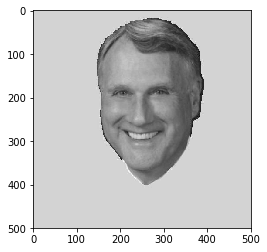

In [10]:
img=read_images(img_data_dir,500,500,3)
img_gray = [ color.rgb2gray(i) for i in img]
plt.imshow(img_gray[0],cmap='gray')
ppc=32
hog_images = []
hog_features = []
for image in img_gray:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

In [17]:
hog=np.array(hog_features)
lms_hog=np.concatenate((lms, hog), axis = 1)
# Normalize the new data
new_min_max_scaler = MinMaxScaler()
#y_min_max_scaler = MinMaxScaler()
lms_hog_scale = new_min_max_scaler.fit_transform(lms_hog)
#X_test_minmax = min_max_scaler.transform(X_test)

In [18]:
Train_Rich_Accuracy=np.zeros(14)
Test_Rich_Accuracy=np.zeros(14)
Train_Rich_Precision=np.zeros(14)
Test_Rich_Precision=np.zeros(14)
new_anno=np.array(2*(annotation>0)-1)
param_grid_svc={"C": np.logspace(-2, 3, 5),
            "gamma": np.logspace(-4, -1, 4)}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),param_grid_svc, cv=4)

In [19]:
for i in range(new_anno.shape[1]):
    train_accuracy=[]
    test_accuracy=[]
    train_precision=[]
    test_precision=[]
    for train, test in kf.split(lms_hog_scale):
        train_X=lms_hog_scale[train,:]
        test_X=lms_hog_scale[test,:]
        t0 = time.time()
        clf.fit(train_X, new_anno[train,i])
        print("done in %0.3fs" % (time.time() - t0))
        print("Best estimator found by grid search:")
        print(clf.best_estimator_)
        clf_pred=clf.predict(train_X)
        print("The calculated accuracy is:%0.3f" % (accuracy_score(new_anno[train,i], clf_pred)))
        print("The calculated precision is:%0.3f" % (precision_score(new_anno[train,i], clf_pred)))
        train_Y=clf.predict(train_X)
        test_Y=clf.predict(test_X)
        train_accuracy.append(accuracy_score(new_anno[train,i], train_Y))
        test_accuracy.append(accuracy_score(new_anno[test,i], test_Y))
        train_precision.append(precision_score(new_anno[train,i], train_Y))
        test_precision.append(precision_score(new_anno[test,i], test_Y))
        
    print("The Train Accuracy for No.%d facial trait is:" %(i+1))
    Train_Rich_Accuracy[i]=np.mean(np.array(train_accuracy))
    Train_Rich_Accuracy[i]
    print("The Test Accuracyfor No.%d facial trait is:" %(i+1))
    Test_Rich_Accuracy[i]=np.mean(np.array(test_accuracy))
    Test_Rich_Accuracy[i]
    print("The Train Precision for No.%d facial trait is:" %(i+1))
    Train_Rich_Precision[i]=np.mean(np.array(train_precision))
    Train_Rich_Precision[i]
    print("The Test Precision for No.%d facial trait is:" %(i+1))
    Test_Rich_Precision[i]=np.mean(np.array(test_precision))
    Test_Rich_Precision[i]

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 144.883s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.826
The calculated precision is:0.850


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 147.813s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 140.630s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.859
The calculated precision is:0.855


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 144.015s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.997
The calculated precision is:1.000
The Train Accuracy for No.1 facial trait is:


0.9205181453988454

The Test Accuracyfor No.1 facial trait is:


0.6823937091829935

The Train Precision for No.1 facial trait is:


0.9261148965027287

The Test Precision for No.1 facial trait is:


0.6819600489860906

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 139.204s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.829
The calculated precision is:0.810


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.031s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.807
The calculated precision is:0.767


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 120.537s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.810
The calculated precision is:0.848


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 120.720s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.797
The calculated precision is:0.812
The Train Accuracy for No.2 facial trait is:


0.8106000353481796

The Test Accuracyfor No.2 facial trait is:


0.6396441423430628

The Train Precision for No.2 facial trait is:


0.8092418292900536

The Test Precision for No.2 facial trait is:


0.6512039146066412

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 118.388s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 118.250s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.856
The calculated precision is:0.849


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 117.532s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.845
The calculated precision is:0.829


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 118.374s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000
The Train Accuracy for No.3 facial trait is:


0.9252717391304348

The Test Accuracyfor No.3 facial trait is:


0.6455084632813541

The Train Precision for No.3 facial trait is:


0.9196286309596764

The Test Precision for No.3 facial trait is:


0.6502200279788665

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 120.261s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.298s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 120.239s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.796
The calculated precision is:0.867


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.496s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.808
The calculated precision is:0.873
The Train Accuracy for No.4 facial trait is:


0.9009459320136679

The Test Accuracyfor No.4 facial trait is:


0.5579268292682926

The Train Precision for No.4 facial trait is:


0.9350210970464135

The Test Precision for No.4 facial trait is:


0.5687758799171843

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.353s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.842
The calculated precision is:0.814


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.962s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 118.201s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.777
The calculated precision is:0.745


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 122.267s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.783
The calculated precision is:0.789
The Train Accuracy for No.5 facial trait is:


0.8506907623424061

The Test Accuracyfor No.5 facial trait is:


0.6171697987471678

The Train Precision for No.5 facial trait is:


0.8368769758619408

The Test Precision for No.5 facial trait is:


0.5978375863902179

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 117.795s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 117.297s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.859
The calculated precision is:0.876


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.548s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.840
The calculated precision is:0.846


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.381s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.997
The calculated precision is:1.000
The Train Accuracy for No.6 facial trait is:


0.9239148845292802

The Test Accuracyfor No.6 facial trait is:


0.6883913101426097

The Train Precision for No.6 facial trait is:


0.930340488527017

The Test Precision for No.6 facial trait is:


0.6973401598401598

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.373s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.826
The calculated precision is:0.838


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.157s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.995
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.000s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.995
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 118.594s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000
The Train Accuracy for No.7 facial trait is:


0.9538043478260869

The Test Accuracyfor No.7 facial trait is:


0.6212181793949088

The Train Precision for No.7 facial trait is:


0.9594594594594594

The Test Precision for No.7 facial trait is:


0.6307429130009775

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 117.799s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.311s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.853
The calculated precision is:0.891


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 118.139s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.997
The calculated precision is:0.995


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.516s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.856
The calculated precision is:0.921
The Train Accuracy for No.8 facial trait is:


0.9267280104866267

The Test Accuracyfor No.8 facial trait is:


0.6558876449420232

The Train Precision for No.8 facial trait is:


0.9515806414335046

The Test Precision for No.8 facial trait is:


0.6679278238101767

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 118.736s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.872
The calculated precision is:0.870


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.439s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.788
The calculated precision is:0.762


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.345s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.995
The calculated precision is:0.990


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 120.171s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000
The Train Accuracy for No.9 facial trait is:


0.9137228260869565

The Test Accuracyfor No.9 facial trait is:


0.6008263361322138

The Train Precision for No.9 facial trait is:


0.905594194263951

The Test Precision for No.9 facial trait is:


0.6109841208816152

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.444s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.837
The calculated precision is:0.821


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 121.188s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.758
The calculated precision is:0.738


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 120.015s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 120.832s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000
The Train Accuracy for No.10 facial trait is:


0.8987771739130435

The Test Accuracyfor No.10 facial trait is:


0.5558609889377581

The Train Precision for No.10 facial trait is:


0.8899365821094793

The Test Precision for No.10 facial trait is:


0.5589876575630253

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.016s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.880
The calculated precision is:0.878


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 118.939s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 118.828s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.997
The calculated precision is:0.995


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 120.469s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.805
The calculated precision is:0.780
The Train Accuracy for No.11 facial trait is:


0.920648860021209

The Test Accuracyfor No.11 facial trait is:


0.5864987338397973

The Train Precision for No.11 facial trait is:


0.9132230088977009

The Test Precision for No.11 facial trait is:


0.5922445767513904

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.115s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.826
The calculated precision is:0.814


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.281s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.774
The calculated precision is:0.768


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 125.857s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.818
The calculated precision is:0.842


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 134.500s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.995
The calculated precision is:1.000
The Train Accuracy for No.12 facial trait is:


0.8532645516672559

The Test Accuracyfor No.12 facial trait is:


0.5641076902572305

The Train Precision for No.12 facial trait is:


0.8562720457090254

The Test Precision for No.12 facial trait is:


0.5478287100017745

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.140s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.755
The calculated precision is:0.787


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 118.626s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.823
The calculated precision is:0.866


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.707s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.772
The calculated precision is:0.829


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.704s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.827
The calculated precision is:0.844
The Train Accuracy for No.13 facial trait is:


0.7942754359608813

The Test Accuracyfor No.13 facial trait is:


0.5967113154738105

The Train Precision for No.13 facial trait is:


0.8314629450182922

The Test Precision for No.13 facial trait is:


0.6285318396226415

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.453s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.834
The calculated precision is:0.831


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 118.875s
Best estimator found by grid search:
SVC(C=3.1622776601683795, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:1.000
The calculated precision is:1.000


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.032s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.848
The calculated precision is:0.875


GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 1.77828e-01, 3.16228e+00, 5.62341e+01, 1.00000e+03]), 'gamma': array([0.0001, 0.001 , 0.01  , 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

done in 119.365s
Best estimator found by grid search:
SVC(C=56.23413251903491, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The calculated accuracy is:0.997
The calculated precision is:1.000
The Train Accuracy for No.14 facial trait is:


0.9198387975727584

The Test Accuracyfor No.14 facial trait is:


0.5864154338264693

The Train Precision for No.14 facial trait is:


0.9265988372093024

The Test Precision for No.14 facial trait is:


0.5804945054945055

Text(0.5,1,'(b) Average Accuracy(Rich Features)')

Text(0.5,1,'(c) Average Precision(Rich Features)')

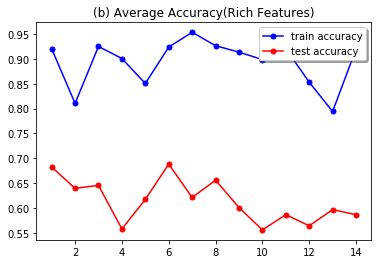

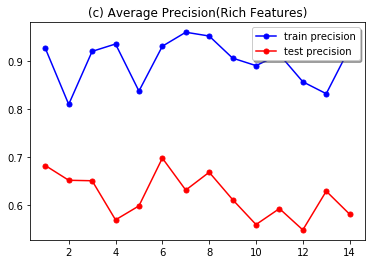

In [20]:
No_traits=np.linspace(1,14,14)
fig, ax = plt.subplots()
ax.plot(No_traits, Train_Rich_Accuracy, 'b',marker='.',markersize=10, label='train accuracy')
ax.plot(No_traits, Test_Rich_Accuracy, 'r', marker='.',markersize=10,label='test accuracy')
legend = ax.legend(loc='upper right', shadow=True)
size = fig.get_size_inches() # get fig size in pixels
ax.set_title('(b) Average Accuracy(Rich Features)') 
fig.savefig('Accuracy_Rich.jpg')   # save the figure to file
#plt.close(fig)    # close the figure
fig, ax = plt.subplots()
ax.plot(No_traits, Train_Rich_Precision, 'b',marker='.',markersize=10, label='train precision')
ax.plot(No_traits, Test_Rich_Precision, 'r', marker='.',markersize=10,label='test precision')
legend = ax.legend(loc='upper right', shadow=True)
size = fig.get_size_inches() # get fig size in pixels
ax.set_title('(c) Average Precision(Rich Features)') 
fig.savefig('Precision_Rich.jpg')   # save the figure to file
#plt.close(fig)    # close the figure

In [24]:
print("The Average Accuracy using rich features are:" )
Test_Rich_Precision

The Average Accuracy using rich features are:


array([0.68196005, 0.65120391, 0.65022003, 0.56877588, 0.59783759,
       0.69734016, 0.63074291, 0.66792782, 0.61098412, 0.55898766,
       0.59224458, 0.54782871, 0.62853184, 0.58049451])